# TIDES Workshop: Instaseis Tutorial

**Goal of the Practical:** To be able to calculate seismograms on a 1D background model with [Instaseis](http://www.instaseis.net), assuming the Green's function database computed with [AxiSEM](http://www.axisem.info) is provided.


**Tenative Timetable:**

* [10 min] Introduction and getting everyone on the same page
* [20 min] Instaseis GUI
* [45 min] Basic Exercise (everybody should do this): use Instaseis to seismograms for the same earthquakes and stations as the last days.
* [30 - x min] Advanced exercises: some fun stuff to choose from

**Tasks:**

* Play with GUI: mechanism, depth, location, arrival times...
* Calculate synthetics for the given events and stations
* Plot record section
* Finite Source, compare to point source solution, in GUI?
* PGA as a function of distance, source depth
* compare meteorite impact to earthquake (plot spectra)

## Exercise 1: Play around with the GUI

The GUI is great tool to teach and observe basic properties of seismograms. Launch it by entering

```bash
$ python -m instaseis.gui
```

in a shell.

<img style="width:60%" src="instaseis_images/GUI_screenshot.png"></img>


#### Tasks:

1. Modify the source depth for a source at teleseismic distance; observe how surface waves behave.
2. Observe how the polarity of the first arrivals flips when crossing nodal planes of a double couple source.
3. Observe triplicated phases for shallow sources
4. Observe the Hilbert transformed shape of reflected phases.

-----

Basic four lines (as always).

In [48]:
%pylab inline
from __future__ import print_function
import matplotlib.pylab as plt
import os
import obspy
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

event_folder = os.path.join("data", "events")
stations_folder = os.path.join("data", "stations")
quakeml_folder = os.path.join(event_folder, "quakeml")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


-----

## Basic Instaseis Introduction

Please have a look at our webpage - http://www.instaseis.net/ - where everything is documented extensively.

### Opening a Database

Before you can get going you have to (as always in Python) import `instaseis`.

In [2]:
import instaseis

An Instaseis database must be opened before it can be used. Please keep in mind that this is by far the most expensive operation in Instaseis so you want to limit how often you do it. There are a couple of optional parameters here, for now the defaults are fine.

The virtual box has a database at

**~/path/to/db/bla**

In [3]:
#db = instaseis.open_db("/Users/lion/workspace/code/axisem/SOLVER/20s_PREM_ANI_FORCES")
db = instaseis.open_db("/media/ex/instaseis/Martin/ak135f_TIDES")

Some basic information about the loaded database can be reviewed by just printing it.

In [4]:
print(db)

InstaseisDB reciprocal Green's function Database (v7) generated with these parameters:
	components           : vertical and horizontal
	velocity model       : ak135f
	attenuation          : True
	dominant period      : 20.000 s
	dump type            : displ_only
	excitation type      : dipole
	time step            : 4.997 s
	sampling rate        : 0.200 Hz
	number of samples    : 721
	seismogram length    : 3598.1 s
	source time function : gauss_0
	source shift         : 34.982 s
	spatial order        : 4
	min/max radius       : 6221.0 - 6371.0 km
	Planet radius        : 6371.0 km
	min/max distance     : 0.0 - 180.0 deg
	time stepping scheme : newmark2
	compiler/user        : gfortran 4.8.2 by vandriel on D-14-L-12
	directory/url        : ../../../../../media/ex/instaseis/Martin/ak135f_TIDES
	size of netCDF files : 914.9 MB
	generated by AxiSEM version v1.2-2-g9c86 at 2015-05-07T14:45:41.000000Z



From this you can already glance a couple of aspects of the database used for this tutorial:

* uses ak135f as its 1D model
* is accurate for periods down to 20 seconds
* includes vertical and horizontal components
* sources can have depths ranging from 0 to 150 km
* one hour long seismograms

### Receivers and Sources

Instaseis calculates seismograms for any source and receiver pair. A receiver has coordinates and optionally network and station codes.

In [5]:
rec = instaseis.Receiver(latitude=44.06238, longitude=10.59698,
                         network="IV", station="BDI")
print(rec)

Instaseis Receiver:
	longitude :   10.6 deg
	latitude  :   44.1 deg
	network   : IV
	station   : BDI



Sources are naturally a bit more complex and Instaseis offers a variety of ways to define them. The straightforward way is to pass coordinates and the moment tensor components.

In [5]:
src = instaseis.Source.from_strike_dip_rake(
    latitude=27.77,
    longitude=85.37,
    depth_in_m=12000.0,
    M0=1e+21,
    strike=32.,
    dip=62.,
    rake=90.)
print(src)

Instaseis Source:
	origin time      : 1970-01-01T00:00:00.000000Z
	Longitude        :   85.4 deg
	Latitude         :   27.8 deg
	Depth            : 1.2e+01 km
	Moment Magnitude :   8.00
	Scalar Moment    :   1.00e+21 Nm
	Mrr              :   8.29e+20 Nm
	Mtt              :  -2.33e+20 Nm
	Mpp              :  -5.96e+20 Nm
	Mrt              :   2.96e+20 Nm
	Mrp              :   4.74e+20 Nm
	Mtp              :  -3.73e+20 Nm



Sidenode: The moment tensor can be visualized using the Beachball function from obspy.imaging:

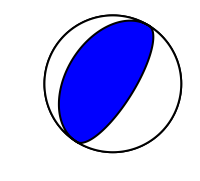

In [25]:
from obspy.imaging.beachball import Beachball

mt = src.tensor / src.M0 # normalize the tensor to avoid problems in the plotting
Beachball(mt, size=200, linewidth=2, facecolor='b');

These two objects now enable the calculation of synthetics.

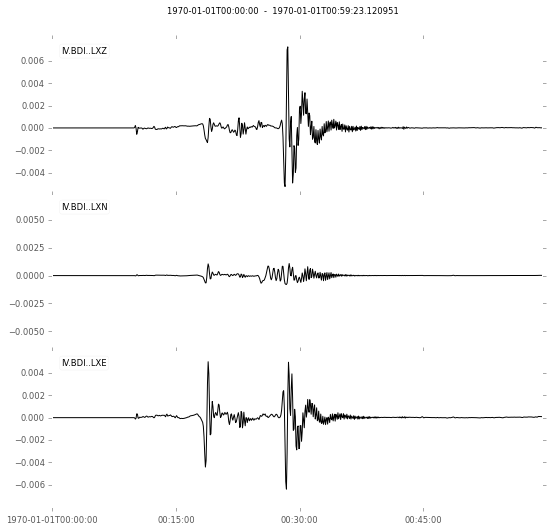

In [19]:
st = db.get_seismograms(source=src, receiver=rec)
st.plot();

## Basic Exercise

**Task:** Calculate three component synthetics for the stations and events used on Monday and today and save them in on disc organized so that you can work with them tomorrow.

#### Notes

1. Receiver objects can also be created from StationXML, SEED, or STATIONS files as well as obpy inventories; see the [documentation](http://www.instaseis.net/source.html#receiver) for details.
2. Source objects can also be created from QuakeML, CMTSOLUTIONS, and in other ways; see the [documentation](http://www.instaseis.net/source.html#source) for details.
3. The `get_seismograms()` method has a couple of extra arguments:
    A. `kind`: `displacement`, `velocity`, `acceleration`
    B. `remove_source_shift`, `reconvolve_stf`, `dt`, ... see the [documentation](http://www.instaseis.net/instaseis.html#instaseis.base_instaseis_db.BaseInstaseisDB.get_seismograms) for details.
4. You can use the properties of the Receiver and Source objects to create usefull filenames.

## Solution
### 1. Load Receivers
**reminder:** use obspy to load stations and plot a map:

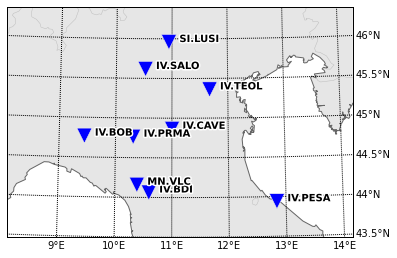

In [13]:
from obspy import read_inventory
inventory = read_inventory(os.path.join(stations_folder, "all_stations.xml"))
inventory.plot(projection="local", resolution="i");

This inventory can directly be used as input to generate instaseis.Receiver objects:

In [15]:
receivers = instaseis.Receiver.parse(inventory)
for rec in receivers[:2]:
    print(rec)

Instaseis Receiver:
	longitude :   10.6 deg
	latitude  :   44.1 deg
	network   : IV
	station   : BDI

Instaseis Receiver:
	longitude :    9.4 deg
	latitude  :   44.8 deg
	network   : IV
	station   : BOB



**Alternatively**, instaseis can directly open the station xml file (but then you don't have the nice plot):

In [16]:
receivers = instaseis.Receiver.parse(os.path.join(stations_folder, "all_stations.xml"))
for rec in receivers[:2]:
    print(rec)

Instaseis Receiver:
	longitude :   10.6 deg
	latitude  :   44.1 deg
	network   : IV
	station   : BDI

Instaseis Receiver:
	longitude :    9.4 deg
	latitude  :   44.8 deg
	network   : IV
	station   : BOB



### 2. Load Events
**reminder:** use obspy to load events and plot a map:

6 Event(s) in Catalog:
2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1 Mwc
2012-05-29T07:00:02.880000Z | +44.842,  +11.066 | 5.6 Mw | manual
2014-04-04T01:37:57.900000Z | -20.610,  -70.910 | 6.2 Mwc
2015-05-12T07:05:28.500000Z | +27.560,  +86.100 | 7.2 Mwc
2015-01-23T06:51:20.340000Z | +44.127,  +11.121 | 4.3 Mw | manual
2015-04-25T06:11:58.400000Z | +27.770,  +85.370 | 7.9 Mwc


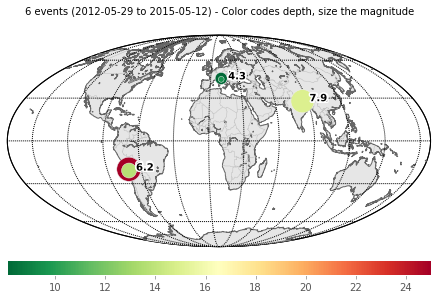

In [24]:
import glob # provides iterator to loop over files

cat = obspy.core.event.Catalog()

for filename in glob.iglob(os.path.join(quakeml_folder, '*.xml')):
     cat += obspy.readEvents(filename)
print(cat)
cat.plot();

**Alternatively** load quakeml directly using instaseis.Source.parse:

In [37]:
sources = []

for filename in glob.iglob(os.path.join(quakeml_folder, '*.xml')):
    sources.append(instaseis.Source.parse(filename))
    
for src in sources[:2]:
    print(src)

Instaseis Source:
	origin time      : 2014-04-01T23:47:31.500000Z
	Longitude        :  -70.8 deg
	Latitude         :  -19.7 deg
	Depth            : 2.2e+01 km
	Moment Magnitude :   8.19
	Scalar Moment    :   1.90e+21 Nm
	Mrr              :   9.20e+20 Nm
	Mtt              :  -3.90e+19 Nm
	Mpp              :  -8.81e+20 Nm
	Mrt              :   6.37e+20 Nm
	Mrp              :  -1.53e+21 Nm
	Mtp              :   2.05e+20 Nm

Instaseis Source:
	origin time      : 2012-05-29T07:00:02.880000Z
	Longitude        :   11.1 deg
	Latitude         :   44.8 deg
	Depth            : 8.1e+00 km
	Moment Magnitude :   5.70
	Scalar Moment    :   3.51e+17 Nm
	Mrr              :   3.43e+17 Nm
	Mtt              :  -3.36e+17 Nm
	Mpp              :  -7.06e+15 Nm
	Mrt              :  -8.66e+16 Nm
	Mrp              :   9.05e+15 Nm
	Mtp              :   2.84e+16 Nm



### 3. Extract Seismograms and Save to File

In [40]:
dt = 1.

for src in sources:
    srcname = '%s_Mw_%3.1f' % (src.origin_time.date, src.moment_magnitude)
    for rec in receivers:
        # create a usefull filename
        recname = '%s_%s' % (rec.network, rec.station)
        filename = '%s_%s' % (recname, srcname)
        filename = filename.replace('.', '_')
        
        # extract seismograms using instaseis
        st = db.get_seismograms(source=src, receiver=rec, dt=dt)
        
        # write to miniseed files
        st.write(os.path.join('data_out', filename + '.mseed'), format='mseed')

## Advanced Exercise 1: Plot Record Section

Use Instaseis to calculate a record section of your choice.

#### Notes

1. obspy Trace objects provide a function times() to conveniently get the time axis for plotting and the normalize() function to normalize seismograms to a common amplitude.
2. use high pass filtering and deep sources if you want to enhance body waves
3. np.linspace() can help to generate equidistant stations
4. obspy.taup.getTravelTimes can be used to compare with ray theoretical arrivals

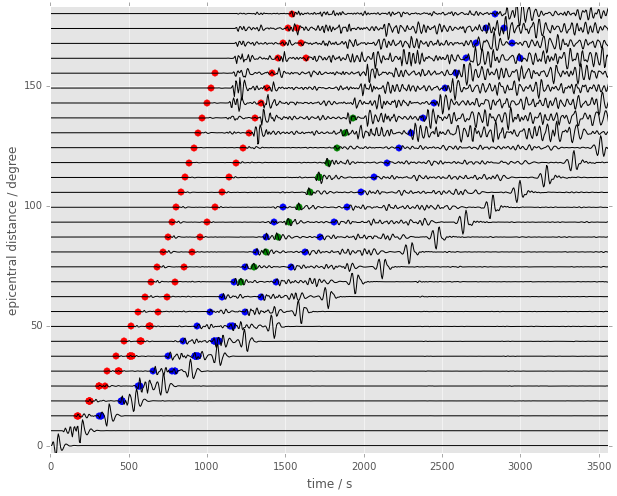

In [104]:
from obspy.taup import getTravelTimes
from collections import defaultdict

# some paramters
depth_in_km = 150.
mindist = 0.
maxdist = 180.
numrec = 30
fmin = 0.02
fmax = 0.1
component = "Z"
phases = ["P", "PP", "Pdiff", "S", "SS", "PS"]
colors = ["r", "r", "r", "b", "b", "g"]

# define instaseis source
src = instaseis.Source.from_strike_dip_rake(latitude=0., longitude=0., depth_in_m=depth_in_km * 1e3,
                                            M0=1e+21, strike=32., dip=62., rake=90.)

# storage for traveltimes
distances = defaultdict(list)
ttimes = defaultdict(list)

# loop over distances
for dist in np.linspace(mindist, maxdist, numrec):
    # define receiver
    rec = instaseis.Receiver(latitude=0, longitude=dist)

    # generate seismogram, filter and plot
    tr = db.get_seismograms(source=src, receiver=rec, components=[component])[0]
    tr.filter('highpass', freq=fmin)
    tr.filter('lowpass', freq=fmax)
    tr.normalize()
    plt.plot(tr.times(), tr.data * 5 + dist, color="black")
    
    # get traveltimes
    tts = getTravelTimes(dist, depth_in_km, "ak135", phase_list=phases)
    for phase in tts:
        name = phase["phase_name"]
        distances[name].append(dist)
        ttimes[name].append(phase["time"])

# plot traveltimes
for color, phase in zip(colors, phases):
    plt.scatter(ttimes[phase], distances[phase], s=40, color=color)

plt.xlim(tr.times()[0], tr.times()[-1])
plt.ylim(mindist - 3, maxdist + 3)
plt.xlabel('time / s')
plt.ylabel('epicentral distance / degree')
plt.show()

### Advanced Exercise 2: PGA as a function of depth and distance
not sure if this makes sense for long period databases

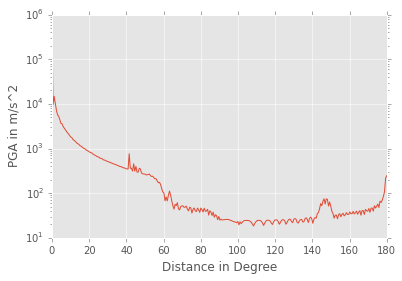

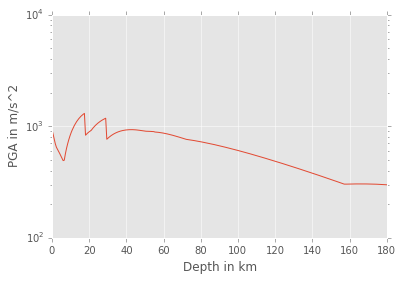

In [10]:
import numpy as np

# Scenario 1: Fixed depth, change distance.
pga = []
distances = []
for dist in np.linspace(0, 180, 300):
    rec = instaseis.Receiver(latitude=0, longitude=dist)
    src = instaseis.Source(latitude=0, longitude=0, depth_in_m=12000.0,        
                           m_rr=1.730000e+27, m_tt=-1.790000e+27, m_pp=5.600000e+25,
                           m_rt=7.520000e+27, m_rp=-5.870000e+26, m_tp=4.540000e+26)
    
    tr = db.get_seismograms(source=src, receiver=rec, components=["Z"], kind="acceleration")[0]
    pga.append(np.abs(tr.data).max())
    distances.append(dist)

plt.semilogy(distances, pga)
plt.xlabel("Distance in Degree")
plt.ylabel("PGA in m/s^2")
plt.show();

# Scenario 2: Fixed distance, change depth.
pga = []
depths = []
for depth in np.linspace(0, 150, 300):
    rec = instaseis.Receiver(latitude=0, longitude=15)
    src = instaseis.Source(latitude=0, longitude=0, depth_in_m=depth * 1000.0,        
                           m_rr=1.730000e+27, m_tt=-1.790000e+27, m_pp=5.600000e+25,
                           m_rt=7.520000e+27, m_rp=-5.870000e+26, m_tp=4.540000e+26)
    
    tr = db.get_seismograms(source=src, receiver=rec, components=["Z"], kind="acceleration")[0]
    pga.append(np.abs(tr.data).max())
    depths.append(depth)

plt.semilogy(distances, pga)
plt.xlabel("Depth in km")
plt.ylabel("PGA in m/s^2")
plt.show();

### Advanced Exercise 3: Spectra of Earthquake Source vs Meteorite Impact